<a href="https://colab.research.google.com/github/avelad31/Retail_Price_Optimization/blob/main/pricing_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimización de Precios en Retail: Un Modelo de Elasticidad para Canales Online y Físicos**

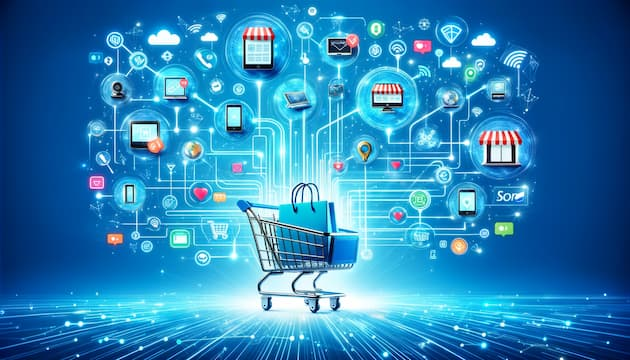

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

In [2]:
df = pd.read_csv("Retail_Dataset3.csv")

In [3]:
df.head(10)

,Product_ID,Channel,Price,Promotion,Competitor_Price,Location_Type,Weekday,Stock_Availability,Sales,Revenue
0,1,Online,25.03,1,86.50,Urban,Wednesday,In Stock,784.186000,19628.175574
1,2,Physical,25.09,1,27.66,Urban,Monday,Low Stock,544.750868,13667.799272
2,3,Physical,13.30,1,21.30,Urban,Wednesday,In Stock,341.525045,4542.283099
3,4,Online,76.28,1,96.71,Suburban,Wednesday,In Stock,558.938457,42635.825535
4,5,Online,69.74,0,19.72,Urban,Monday,In Stock,345.427129,24090.088005
5,6,Online,52.72,1,53.06,Suburban,Friday,In Stock,437.306181,23054.781847
6,7,Online,85.98,1,62.70,Rural,Sunday,Out of Stock,405.265420,34844.720806
7,8,Physical,82.51,0,58.72,Rural,Wednesday,In Stock,394.426703,32544.147231
8,9,Physical,62.68,0,17.74,Urban,Monday,In Stock,349.278480,21892.775134
9,10,Physical,88.14,1,15.13,Urban,Friday,Low Stock,165.504305,14587.549442


In [4]:
dataset_shape = df.shape
print(f"Dimensiones del dataset: {dataset_shape}")

Dimensiones del dataset: (1400, 10)


In [5]:
# Nombres de columnas y tipos de datos
columns_types = df.dtypes
print(f"Tipos de datos:\n{columns_types}")

Tipos de datos:
Product_ID              int64
Channel                object
Price                 float64
Promotion               int64
Competitor_Price      float64
Location_Type          object
Weekday                object
Stock_Availability     object
Sales                 float64
Revenue               float64
dtype: object


In [6]:
# Seleccionamos las columnas numéricas
var_num = df.select_dtypes(include=['float64', 'int']).columns
df[var_num].head()

,Product_ID,Price,Promotion,Competitor_Price,Sales,Revenue
0,1,25.03,1,86.50,784.186000,19628.175574
1,2,25.09,1,27.66,544.750868,13667.799272
2,3,13.30,1,21.30,341.525045,4542.283099
3,4,76.28,1,96.71,558.938457,42635.825535
4,5,69.74,0,19.72,345.427129,24090.088005


In [7]:
# Seleccionamos las variables categoricas y las convertimos a string
var_str = ["Channel", "Location_Type", "Weekday", "Stock_Availability"]
df[var_str] = df[var_str].astype(str)
print(df[var_str].shape)
df[var_str].head()

(1400, 4)


,Channel,Location_Type,Weekday,Stock_Availability
0,Online,Urban,Wednesday,In Stock
1,Physical,Urban,Monday,Low Stock
2,Physical,Urban,Wednesday,In Stock
3,Online,Suburban,Wednesday,In Stock
4,Online,Urban,Monday,In Stock


In [8]:
#Resumen estadistico
df.describe()

,Product_ID,Price,Promotion,Competitor_Price,Sales,Revenue
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,700.5000,54.844243,0.290000,54.581564,444.589822,22090.198561
std,404.2895,26.028416,0.453924,25.806007,150.400400,10204.985674
min,1.0000,10.010000,0.000000,10.020000,5.391126,511.348289
25%,350.7500,33.047500,0.000000,32.495000,344.242339,14263.125067
50%,700.5000,55.055000,0.000000,53.565000,445.853827,20884.583566
75%,1050.2500,77.285000,1.000000,76.680000,542.842721,29368.788878
max,1400.0000,99.950000,1.000000,99.890000,989.091713,59927.618928


In [9]:
# Resumen estadístico completo
statistical_summary = df.describe(include="all")
print(statistical_summary)

        Product_ID Channel        Price    Promotion  Competitor_Price  \
count    1400.0000    1400  1400.000000  1400.000000       1400.000000   
unique         NaN       2          NaN          NaN               NaN   
top            NaN  Online          NaN          NaN               NaN   
freq           NaN     833          NaN          NaN               NaN   
mean      700.5000     NaN    54.844243     0.290000         54.581564   
std       404.2895     NaN    26.028416     0.453924         25.806007   
min         1.0000     NaN    10.010000     0.000000         10.020000   
25%       350.7500     NaN    33.047500     0.000000         32.495000   
50%       700.5000     NaN    55.055000     0.000000         53.565000   
75%      1050.2500     NaN    77.285000     1.000000         76.680000   
max      1400.0000     NaN    99.950000     1.000000         99.890000   

       Location_Type Weekday Stock_Availability        Sales       Revenue  
count           1400    1400      

In [10]:
missing_values_before = df.isnull().sum()
print("\nValores nulos antes de la limpieza:")
print(missing_values_before)


Valores nulos antes de la limpieza:
Product_ID            0
Channel               0
Price                 0
Promotion             0
Competitor_Price      0
Location_Type         0
Weekday               0
Stock_Availability    0
Sales                 0
Revenue               0
dtype: int64


## **Limpieza de Datos**

In [11]:
# Reemplazar valores nulos en columnas numéricas con la mediana
num_columns = df.select_dtypes(include=["float64", "int64"]).columns
df[num_columns] = df[num_columns].apply(lambda x: x.fillna(x.median()))
df[num_columns]

,Product_ID,Price,Promotion,Competitor_Price,Sales,Revenue
0,1,25.03,1,86.50,784.186000,19628.175574
1,2,25.09,1,27.66,544.750868,13667.799272
2,3,13.30,1,21.30,341.525045,4542.283099
3,4,76.28,1,96.71,558.938457,42635.825535
4,5,69.74,0,19.72,345.427129,24090.088005
...,...,...,...,...,...,...
1395,1396,63.42,0,53.01,411.802414,26116.509119
1396,1397,16.58,0,41.98,506.910936,8404.583315
1397,1398,66.01,0,71.43,478.726417,31600.730798
1398,1399,98.31,0,69.60,321.300556,31587.057702


In [12]:
# Para valores categóricos, reemplazar nulos con la moda
cat_columns = df.select_dtypes(include=["object"]).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.fillna(x.mode()[0]))
df[cat_columns]

,Channel,Location_Type,Weekday,Stock_Availability
0,Online,Urban,Wednesday,In Stock
1,Physical,Urban,Monday,Low Stock
2,Physical,Urban,Wednesday,In Stock
3,Online,Suburban,Wednesday,In Stock
4,Online,Urban,Monday,In Stock
...,...,...,...,...
1395,Physical,Suburban,Sunday,In Stock
1396,Online,Suburban,Monday,Low Stock
1397,Online,Rural,Thursday,In Stock
1398,Physical,Urban,Sunday,In Stock


In [13]:
# Verificar nuevamente los valores nulos
missing_values_after = df.isnull().sum()
print(f"Valores nulos después de la limpieza:\n{missing_values_after}")

Valores nulos después de la limpieza:
Product_ID            0
Channel               0
Price                 0
Promotion             0
Competitor_Price      0
Location_Type         0
Weekday               0
Stock_Availability    0
Sales                 0
Revenue               0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_ID          1400 non-null   int64  
 1   Channel             1400 non-null   object 
 2   Price               1400 non-null   float64
 3   Promotion           1400 non-null   int64  
 4   Competitor_Price    1400 non-null   float64
 5   Location_Type       1400 non-null   object 
 6   Weekday             1400 non-null   object 
 7   Stock_Availability  1400 non-null   object 
 8   Sales               1400 non-null   float64
 9   Revenue             1400 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 109.5+ KB


In [15]:
# Identificación de columnas numéricas relevantes
num_cols = ['Price', 'Sales', 'Competitor_Price', 'Revenue']

#Identificamos los outliers usando el rango intercuartílico (IQR)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nOutliers en la columna {col}:")
    print(f"Límite inferior: {lower_bound}, Límite superior: {upper_bound}")

    # Identificar filas con outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Cantidad de outliers detectados: {len(outliers)}")


Outliers en la columna Price:
Límite inferior: -33.30874999999999, Límite superior: 143.64124999999999
Cantidad de outliers detectados: 0

Outliers en la columna Sales:
Límite inferior: 46.3417666024132, Límite superior: 840.7432940584633
Cantidad de outliers detectados: 7

Outliers en la columna Competitor_Price:
Límite inferior: -33.78249999999999, Límite superior: 142.95749999999998
Cantidad de outliers detectados: 0

Outliers en la columna Revenue:
Límite inferior: -8395.370648487762, Límite superior: 52027.284594099125
Cantidad de outliers detectados: 5


In [16]:
#Tratamiento de outliers
#Winsorización (reemplazar con valores límite)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorizar los outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

## **Analisis Univariado**

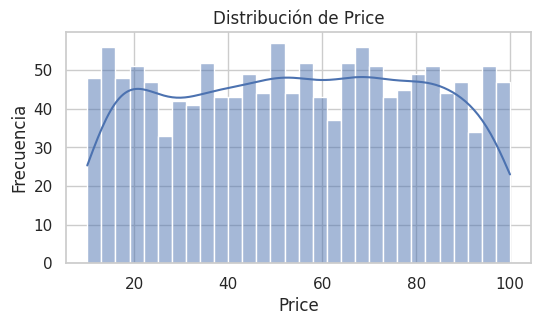

In [17]:
# Distribución de la variable numérica Precio
sns.set(style="whitegrid")

plt.figure(figsize=(6,3))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Distribución de Price")
plt.xlabel("Price")
plt.ylabel("Frecuencia")
plt.show()

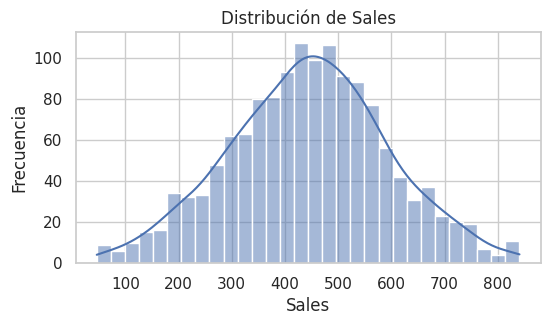

In [18]:
# Distribución de la variable numérica 'Sales'
plt.figure(figsize=(6,3))
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title("Distribución de Sales")
plt.xlabel("Sales")
plt.ylabel("Frecuencia")
plt.show()

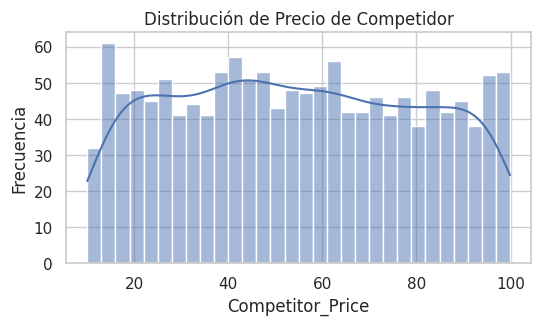

In [19]:
# Distribución de la variable numérica 'Competitor_Price'
plt.figure(figsize=(6,3))
sns.histplot(df['Competitor_Price'], kde=True, bins=30)
plt.title("Distribución de Precio de Competidor")
plt.xlabel("Competitor_Price")
plt.ylabel("Frecuencia")
plt.show()

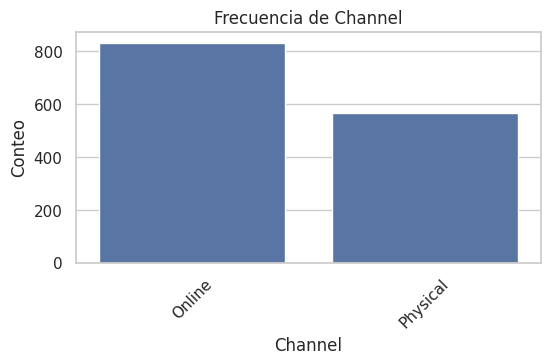

In [20]:
# Visualización para la variable categórica 'Channel'
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Channel', order=df['Channel'].value_counts().index)
plt.title("Frecuencia de Channel")
plt.xlabel("Channel")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.show()

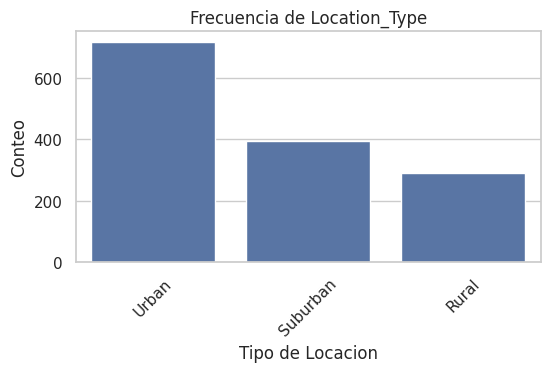

In [21]:
# Visualización para la variable categórica 'Location_Type'
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Location_Type', order=df['Location_Type'].value_counts().index)
plt.title("Frecuencia de Location_Type")
plt.xlabel("Tipo de Locacion")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.show()

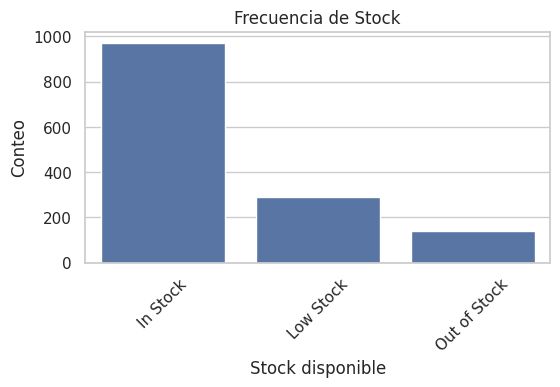

In [22]:
# Visualización para la variable categórica 'Stock_Availability'
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Stock_Availability', order=df['Stock_Availability'].value_counts().index)
plt.title("Frecuencia de Stock")
plt.xlabel("Stock disponible")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.show()

## **Analisis Bivariado**

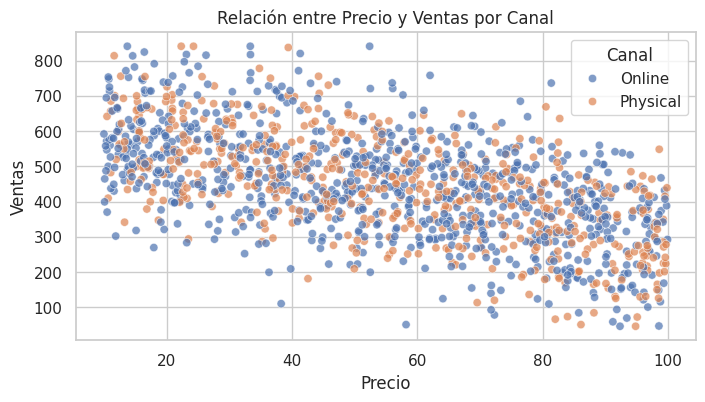

In [23]:
# Gráfica de dispersión entre Precio y Ventas, diferenciando por Canal
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Price', y='Sales', hue='Channel', alpha=0.7)
plt.title('Relación entre Precio y Ventas por Canal')
plt.xlabel('Precio')
plt.ylabel('Ventas')
plt.legend(title='Canal')
plt.show()

In [24]:
# Resumen del análisis hasta ahora
eda_results = {
    "Shape": df.shape,
    "Columns": df.columns.tolist(),
    "Data Types": df.dtypes.to_dict(),
    "Missing Values (Before)": missing_values_before.to_dict(),
    "Missing Values (After)": missing_values_after.to_dict(),
    "Statistical Summary": df.describe(include="all"),
    "First Rows": df.head().to_dict(),
}

In [25]:
# Guardamos una copia limpia del dataset
df.to_csv('Retail_Cleaned_Dataset.csv', index=False)

## **Preparacion de los datos**

In [26]:
# Feature Engineering: Crear nuevas variables útiles para el modelo
df['Relative_Price'] = df['Price'] / (df['Competitor_Price'] + 1e-9)  # Precio relativo
df['Revenue_per_Unit'] = df['Revenue'] / (df['Sales'] + 1e-9)  # Ingresos por unidad

df[['Relative_Price', 'Revenue_per_Unit']]

,Relative_Price,Revenue_per_Unit
0,0.289364,25.03
1,0.907086,25.09
2,0.624413,13.30
3,0.788750,76.28
4,3.536511,69.74
...,...,...
1395,1.196378,63.42
1396,0.394950,16.58
1397,0.924122,66.01
1398,1.412500,98.31


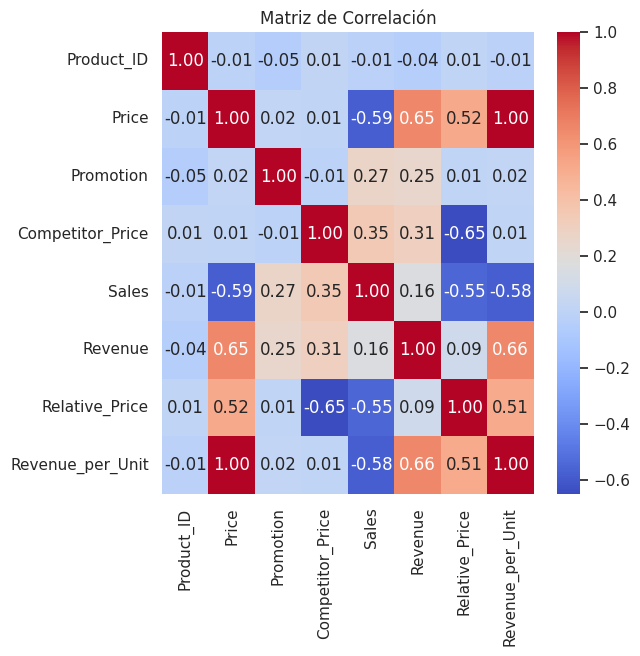

In [27]:
# Mostrar correlaciones entre variables numéricas
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### **Segmentacion de Precios en 'Low', 'Medium' y 'High'**

In [28]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Segmentación dinámica con K-Means
price_data = df[['Price']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Price_Cluster'] = kmeans.fit_predict(price_data)

# Ordenamiento de clusters por el valor promedio del precio
cluster_centers = kmeans.cluster_centers_.flatten()
sorted_clusters = np.argsort(cluster_centers)
cluster_mapping = {sorted_clusters[0]: 'Low', sorted_clusters[1]: 'Medium', sorted_clusters[2]: 'High'}
df['Price_Segment'] = df['Price_Cluster'].map(cluster_mapping)
df[['Price','Price_Segment']].head(7)

,Price,Price_Segment
0,25.03,Low
1,25.09,Low
2,13.30,Low
3,76.28,High
4,69.74,Medium
5,52.72,Medium
6,85.98,High


In [29]:
# Verificar la distribución
print("total de valores de:",df['Price_Segment'].value_counts())

total de valores de: Price_Segment
Medium    480
High      462
Low       458
Name: count, dtype: int64


In [30]:
#Generando los limites de los tipos de Precios
print("\nCentros de los clusters:")
print(cluster_centers)

# Calculate approximate boundaries based on cluster centers
lower_medium = (cluster_centers[sorted_clusters[0]] + cluster_centers[sorted_clusters[1]]) / 2
upper_medium = (cluster_centers[sorted_clusters[1]] + cluster_centers[sorted_clusters[2]]) / 2

print(f"\nAproximación de los límites:")
print(f"Low: < {lower_medium:.2f}")
print(f"Medium: {lower_medium:.2f} - {upper_medium:.2f}")
print(f"High: > {upper_medium:.2f}")


Centros de los clusters:
[84.75512931 24.35417031 55.02374477]

Aproximación de los límites:
Low: < 39.69
Medium: 39.69 - 69.89
High: > 69.89


In [31]:
# Eliminamos la columna 'Price_Cluster'
df.drop(columns=['Price_Cluster'], inplace=True)

In [32]:
# Definir preprocesador
num_features = ['Price', 'Competitor_Price', 'Relative_Price']
cat_features = ['Channel', 'Location_Type', 'Stock_Availability']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Price', 'Competitor_Price',
                                  'Relative_Price']),
                                ('cat', OneHotEncoder(),
                                 ['Channel', 'Location_Type',
                                  'Stock_Availability'])])

In [33]:
# Creacion de pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()) #Regresion Lineal como Base
])

In [34]:
# Evaluación por segmento: Low
print("\nEvaluando segmento 'Low'...")
df_low = df[df['Price_Segment'] == 'Low']
X_low = df_low[['Price', 'Competitor_Price', 'Promotion', 'Channel', 'Location_Type', 'Stock_Availability', 'Relative_Price']]
y_low = df_low['Sales']

X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.18, random_state=42)


Evaluando segmento 'Low'...


In [35]:
# Entrenamiento del modelo para 'Low'
model_pipeline.fit(X_train_low, y_train_low)
y_pred_low = model_pipeline.predict(X_test_low)
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price', 'Competitor_Price',
                                                   'Relative_Price']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Channel', 'Location_Type',
                                                   'Stock_Availability'])])),
                ('regressor', LinearRegression())])

In [36]:
#Metricas de desempeño para 'Low'
mae_low = mean_absolute_error(y_test_low, y_pred_low)
mape_low = (abs((y_test_low - y_pred_low) / y_test_low).mean()) * 100
mse_low = mean_squared_error(y_test_low, y_pred_low)
r2_low = r2_score(y_test_low, y_pred_low)

print("\nResultados para el segmento 'Low':")
print(f"MAE: {mae_low:.2f}")
print(f"MAPE: {mape_low:.2f}%")
print(f"MSE: {mse_low:.2f}")
print(f"R²: {r2_low:.2f}")


Resultados para el segmento 'Low':
MAE: 73.75
MAPE: 14.61%
MSE: 8009.55
R²: 0.21


In [37]:
# Evaluación por segmento: Medium
print("\nEvaluando segmento 'Medium'...")
df_medium = df[df['Price_Segment'] == 'Medium']
X_medium = df_medium[['Price', 'Competitor_Price', 'Promotion', 'Channel', 'Location_Type', 'Stock_Availability', 'Relative_Price']]
y_medium = df_medium['Sales']

X_train_medium, X_test_medium, y_train_medium, y_test_medium = train_test_split(X_medium, y_medium, test_size=0.26, random_state=42)


Evaluando segmento 'Medium'...


In [38]:
# Entrenamiento del modelo para 'Medium'
model_pipeline.fit(X_train_medium, y_train_medium)
y_pred_medium = model_pipeline.predict(X_test_medium)

In [39]:
# Metricas de desempeño para 'Medium'
mae_medium = mean_absolute_error(y_test_medium, y_pred_medium)
mape_medium = (abs((y_test_medium - y_pred_medium) / y_test_medium).mean()) * 100
mse_medium = mean_squared_error(y_test_medium, y_pred_medium)
r2_medium = r2_score(y_test_medium, y_pred_medium)

print("\nResultados para el segmento 'Medium':")
print(f"MAE: {mae_medium:.2f}")
print(f"MAPE: {mape_medium:.2f}%")
print(f"MSE: {mse_medium:.2f}")
print(f"R²: {r2_medium:.2f}")


Resultados para el segmento 'Medium':
MAE: 84.71
MAPE: 24.70%
MSE: 11822.81
R²: 0.28


In [40]:
# Evaluación por segmento: High
print("\nEvaluando segmento 'High'...")
df_high = df[df['Price_Segment'] == 'High']
X_high = df_high[['Price', 'Competitor_Price', 'Promotion', 'Channel', 'Location_Type', 'Stock_Availability', 'Relative_Price']]
y_high = df_high['Sales']
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.22, random_state=42)


Evaluando segmento 'High'...


In [41]:
# Entrenamiento del modelo para 'High'
model_pipeline.fit(X_train_high, y_train_high)
y_pred_high = model_pipeline.predict(X_test_high)

In [42]:
# Metricas de desempeño para 'High'
mae_high = mean_absolute_error(y_test_high, y_pred_high)
mape_high = (abs((y_test_high - y_pred_high) / y_test_high).mean()) * 100
mse_high = mean_squared_error(y_test_high, y_pred_high)
r2_high = r2_score(y_test_high, y_pred_high)

print("\nResultados para el segmento 'High':")
print(f"MAE: {mae_high:.2f}")
print(f"MAPE: {mape_high:.2f}%")
print(f"MSE: {mse_high:.2f}")
print(f"R²: {r2_high:.2f}")


Resultados para el segmento 'High':
MAE: 90.21
MAPE: 34.45%
MSE: 11836.91
R²: 0.21


In [43]:
# Resumen de resultados por segmento
segment_results = pd.DataFrame({
    'Segment': ['Low', 'Medium', 'High'],
    'MAE': [mae_low, mae_medium, mae_high],
    'MAPE': [mape_low, mape_medium, mape_high],
    'MSE': [mse_low, mse_medium, mse_high],
    'R²': [r2_low, r2_medium, r2_high]
})
print("\nResumen de resultados por segmento de precios:")
print(segment_results)


Resumen de resultados por segmento de precios:
  Segment        MAE       MAPE           MSE        R²
0     Low  73.745134  14.609570   8009.548739  0.205163
1  Medium  84.711370  24.703974  11822.812648  0.277424
2    High  90.213787  34.451149  11836.905193  0.211554


## **Graficas para nuestro modelo de Segmentacion de Precios**

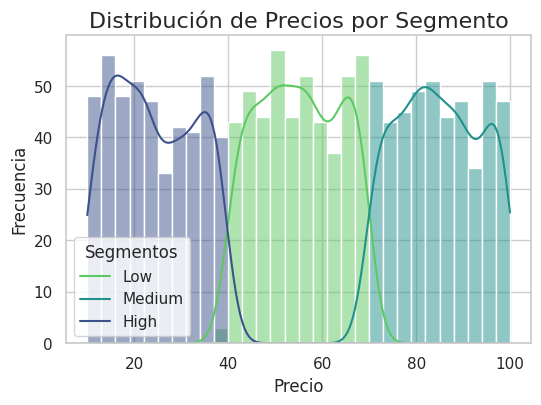

In [44]:
# Histogramas de precios por segmento
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Price', hue='Price_Segment', kde=True, palette='viridis', bins=30)
plt.title('Distribución de Precios por Segmento', fontsize=16)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Segmentos', labels=['Low', 'Medium', 'High'])
plt.show()

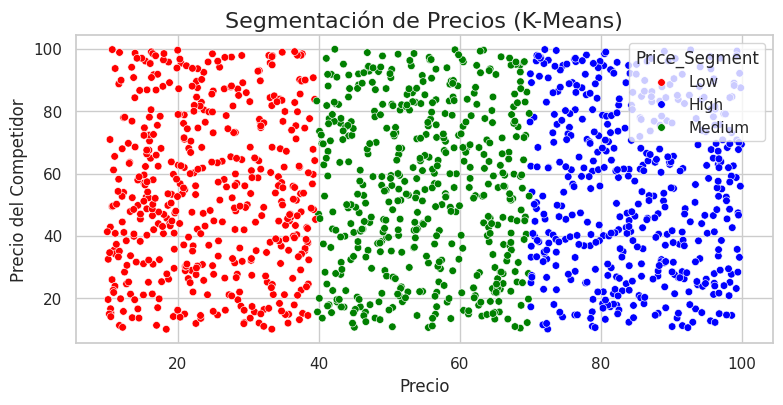

In [45]:
# Diagrama de dispersión (Price vs. Competitor_Price) por segmento
custom_palette = {'Low': 'red', 'Medium': 'green', 'High': 'blue'}
plt.figure(figsize=(9, 4))
sns.scatterplot(data=df,x='Price',y='Competitor_Price',hue='Price_Segment',palette=custom_palette,s=30)

plt.title('Segmentación de Precios (K-Means)', fontsize=16)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Precio del Competidor', fontsize=12)

plt.show()

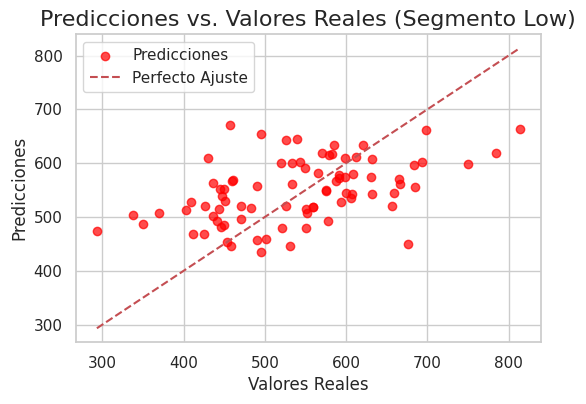

In [46]:
# Comparación predicciones vs. valores reales para 'Low'
plt.figure(figsize=(6, 4))
plt.scatter(y_test_low, y_pred_low, alpha=0.7, color='red', label='Predicciones')
plt.plot([y_test_low.min(), y_test_low.max()], [y_test_low.min(), y_test_low.max()], 'r--', label='Perfecto Ajuste')
plt.title('Predicciones vs. Valores Reales (Segmento Low)', fontsize=16)
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.legend()
plt.show()

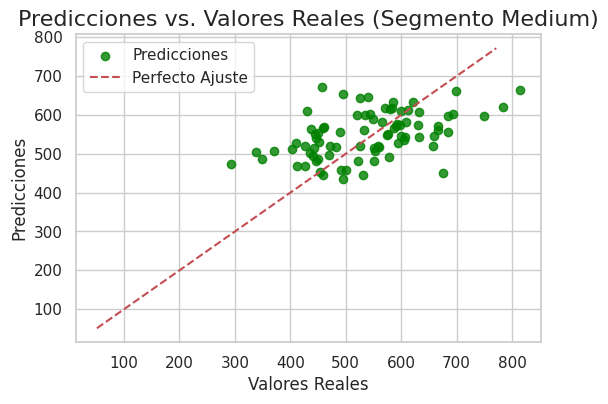

In [47]:
# Comparación predicciones vs. valores reales para 'Low'
plt.figure(figsize=(6, 4))
plt.scatter(y_test_low, y_pred_low, alpha=0.8, color='green', label='Predicciones')
plt.plot([y_test_medium.min(), y_test_medium.max()], [y_test_medium.min(), y_test_medium.max()], 'r--', label='Perfecto Ajuste')
plt.title('Predicciones vs. Valores Reales (Segmento Medium)', fontsize=16)
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.legend()
plt.show()

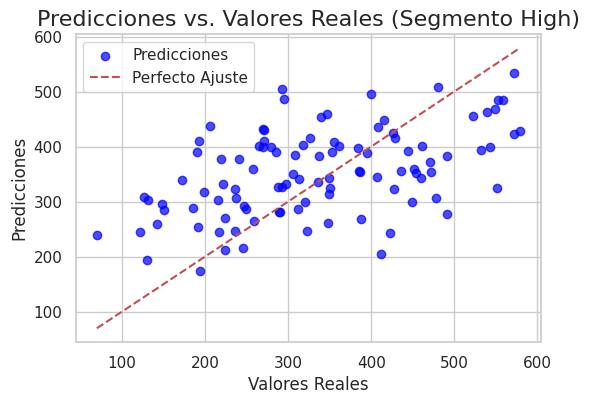

In [48]:
# Comparación predicciones vs. valores reales para 'High'
plt.figure(figsize=(6, 4))
plt.scatter(y_test_high, y_pred_high, alpha=0.7, color='blue', label='Predicciones')
plt.plot([y_test_high.min(), y_test_high.max()], [y_test_high.min(), y_test_high.max()], 'r--', label='Perfecto Ajuste')
plt.title('Predicciones vs. Valores Reales (Segmento High)', fontsize=16)
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.legend()
plt.show()

In [49]:
# Funcion de Curvas de Aprendizaje

def plot_learning_curve(df_segment, segment_label, model_pipeline):
    # Dividir datos
    X = df_segment[['Price', 'Competitor_Price', 'Promotion', 'Channel', 'Location_Type', 'Stock_Availability', 'Relative_Price']]
    y = df_segment['Sales']

    # Tamaños de entrenamiento
    train_sizes = np.linspace(0.1, 1.0, 10)

    # Calculo de curva de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(
        model_pipeline, X, y, train_sizes=train_sizes, scoring='neg_mean_absolute_error', cv=5, random_state=42)

    # Conversin de errores a positivos
    train_errors = -train_scores.mean(axis=1)
    test_errors = -test_scores.mean(axis=1)

    # Graficar curva de aprendizaje
    plt.figure(figsize=(6, 3))
    plt.plot(train_sizes, train_errors, label='Error de Entrenamiento', marker='o')
    plt.plot(train_sizes, test_errors, label='Error de Prueba', marker='o')
    plt.title(f'Curva de Aprendizaje - Segmento {segment_label}', fontsize=16)
    plt.xlabel('Tamaño del Conjunto de Entrenamiento', fontsize=10)
    plt.ylabel('MAE (Error Absoluto Medio)', fontsize=10)
    plt.legend()
    plt.grid(which = "minor")
    plt.show()

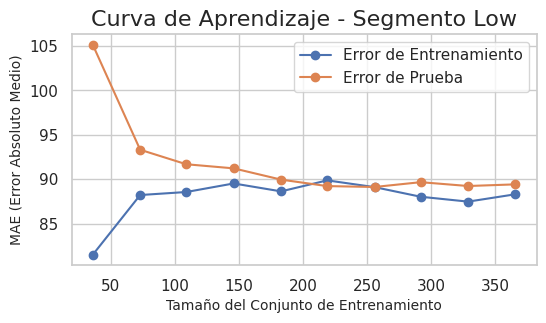

In [50]:
# Curva de Aprendizaje K-MEANS para 'Low'
plot_learning_curve(df[df['Price_Segment'] == 'Low'], 'Low', model_pipeline)

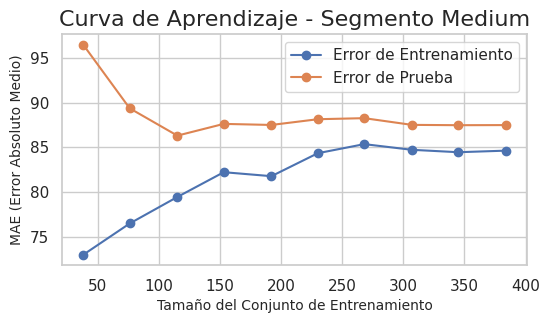

In [51]:
# Curva de Aprendizaje K-MEANS para 'Medium'
plot_learning_curve(df[df['Price_Segment'] == 'Medium'], 'Medium', model_pipeline)

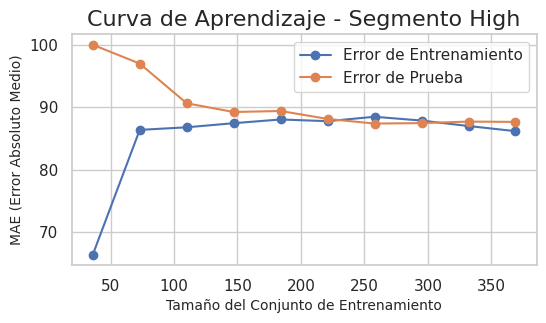

In [52]:
# Curva de Aprendizaje K-MEANS para 'High'
plot_learning_curve(df[df['Price_Segment'] == 'High'], 'High', model_pipeline)

## **Elasticidad de Precios**


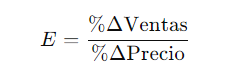

* E < -1: La demanda es muy elástica. Los clientes son sensibles al precio, y pequeños cambios generan grandes variaciones en ventas.
* -1 < E < 0: La demanda es inelástica. Los clientes no son muy sensibles al precio.
* E = 0: La demanda es perfectamente inelástica (los precios no afectan las ventas).
* E > 0: Esto generalmente no ocurre en condiciones normales, pero puede interpretarse en escenarios donde un aumento de precio aumenta la percepción de calidad o prestigio.









In [53]:
# Calculo de elasticidad por segmento
for segment in ['Low', 'Medium', 'High']:
    print(f"\nCalculando elasticidad para el segmento {segment}")
    df_segment = df[df['Price_Segment'] == segment]
    X_segment = df_segment[['Price', 'Competitor_Price', 'Promotion', 'Channel', 'Location_Type', 'Stock_Availability', 'Relative_Price']]
    y_segment = df_segment['Sales']

    model_pipeline.fit(X_segment, y_segment)
    price_coef = model_pipeline.named_steps['regressor'].coef_[0]  # Coeficiente de 'Price'
    avg_price = df_segment['Price'].mean()
    avg_sales = df_segment['Sales'].mean()

    elasticity = price_coef * (avg_price / avg_sales)
    print(f"Elasticidad para {segment}: {elasticity:.2f}")


Calculando elasticidad para el segmento Low
Elasticidad para Low: -1.20

Calculando elasticidad para el segmento Medium
Elasticidad para Medium: -2.77

Calculando elasticidad para el segmento High
Elasticidad para High: -8.60


In [54]:
price_adjustments = [-0.1, 0, 0.1]  # Cambios de precio: -10%, sin cambio, +10%

for segment in ['Low', 'Medium', 'High']:
    print(f"\nSimulando ajustes de precios para el segmento {segment}...")
    df_segment = df[df['Price_Segment'] == segment]
    avg_price = df_segment['Price'].mean()
    avg_sales = df_segment['Sales'].mean()
    price_coef = model_pipeline.named_steps['regressor'].coef_[0]

    for adjustment in price_adjustments:
        new_price = avg_price * (1 + adjustment)
        new_sales = avg_sales * (1 + price_coef * adjustment)
        revenue = new_price * new_sales
        print(f"Ajuste: {adjustment*100:.0f}%, Nuevo Precio: {new_price:.2f}, Ventas: {new_sales:.2f}, Ingresos: {revenue:.2f}")


Simulando ajustes de precios para el segmento Low...
Ajuste: -10%, Nuevo Precio: 21.92, Ventas: 2432.10, Ingresos: 53308.69
Ajuste: 0%, Nuevo Precio: 24.35, Ventas: 545.54, Ingresos: 13286.14
Ajuste: 10%, Nuevo Precio: 26.79, Ventas: -1341.03, Ingresos: -35925.57

Simulando ajustes de precios para el segmento Medium...
Ajuste: -10%, Nuevo Precio: 49.58, Ventas: 1995.34, Ingresos: 98922.70
Ajuste: 0%, Nuevo Precio: 55.09, Ventas: 447.57, Ingresos: 24654.53
Ajuste: 10%, Nuevo Precio: 60.59, Ventas: -1100.20, Ingresos: -66665.57

Simulando ajustes de precios para el segmento High...
Ajuste: -10%, Nuevo Precio: 76.34, Ventas: 1520.10, Ingresos: 116041.08
Ajuste: 0%, Nuevo Precio: 84.82, Ventas: 340.97, Ingresos: 28920.94
Ajuste: 10%, Nuevo Precio: 93.30, Ventas: -838.16, Ingresos: -78201.91


In [55]:
from scipy.optimize import minimize

def revenue_function(price, avg_sales, price_coef):
    sales = avg_sales * (1 + price_coef * ((price - avg_price) / avg_price))
    revenue = price * sales
    return -revenue  # Negativo para maximizar usando `minimize`

for segment in ['Low', 'Medium', 'High']:
    df_segment = df[df['Price_Segment'] == segment]
    avg_price = df_segment['Price'].mean()
    avg_sales = df_segment['Sales'].mean()
    price_coef = model_pipeline.named_steps['regressor'].coef_[0]

    result = minimize(revenue_function, x0=avg_price, args=(avg_sales, price_coef), bounds=[(avg_price * 0.5, avg_price * 1.5)])
    optimal_price = result.x[0]
    print(f"Precio óptimo para el segmento {segment}: {optimal_price:.2f}")

Precio óptimo para el segmento Low: 12.53
Precio óptimo para el segmento Medium: 28.34
Precio óptimo para el segmento High: 43.64


###**Elasticidad de Precios por Segmentos de tipo Channel**
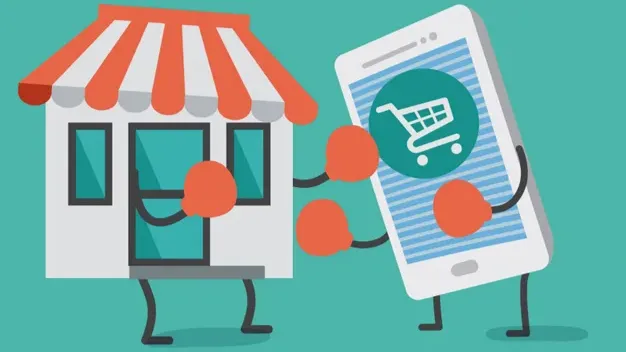




*  Usaremos la **Elasticidad Directa Ajustada**, ya que se calcula utilizando las predicciones del modelo de regresión (en este caso, XGBoost) a partir de un pequeño cambio en el precio, sin necesidad de realizar un análisis más complejo como la regresión de elasticidad.
*   El cálculo se basa en los valores promedio del precio y las ventas, lo que ajusta los resultados a un contexto más general y evita posibles sesgos de los valores extremos.
*   **XGBoost** puede manejar variables categóricas y detectar interacciones automáticamente.



In [56]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Funcion Preprocesamiento
def preprocess_data(df):
    # Creacion de variables dummies para las categóricas
    df = pd.get_dummies(df, drop_first=True)
    df.fillna(df.mean(), inplace=True) # Rellenar valores nulos con la media
    return df

In [57]:
# Filtrar y preprocesar datos para 'Online'
df_online = df[df['Channel'] == 'Online']
df_online['Price_Promotion'] = df_online['Price'] * df_online['Promotion']
df_online['Competitor_Impact'] = df_online['Competitor_Price'] * df_online['Promotion']
X_online = preprocess_data(df_online[['Price', 'Competitor_Price', 'Promotion', 'Relative_Price', 'Price_Promotion', 'Competitor_Impact', 'Location_Type', 'Stock_Availability']])
y_online = df_online['Sales']
X_train_online, X_test_online, y_train_online, y_test_online = train_test_split(X_online, y_online, test_size=0.2, random_state=42)

# Filtrar y preprocesar datos para 'Physical'
df_physical = df[df['Channel'] == 'Physical']
df_physical['Price_Promotion'] = df_physical['Price'] * df_physical['Promotion']
df_physical['Competitor_Impact'] = df_physical['Competitor_Price'] * df_physical['Promotion']
X_physical = preprocess_data(df_physical[['Price', 'Competitor_Price', 'Promotion', 'Relative_Price', 'Price_Promotion', 'Competitor_Impact', 'Location_Type', 'Stock_Availability']])
y_physical = df_physical['Sales']
X_train_physical, X_test_physical, y_train_physical, y_test_physical = train_test_split(X_physical, y_physical, test_size=0.2, random_state=42)

<ipython-input-57-804b8b44c777>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_online['Price_Promotion'] = df_online['Price'] * df_online['Promotion']
<ipython-input-57-804b8b44c777>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_online['Competitor_Impact'] = df_online['Competitor_Price'] * df_online['Promotion']
<ipython-input-57-804b8b44c777>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [58]:
# Ajustamos los hiperparámetros del XGBoost
xgb_params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 100,
    'colsample_bytree': 0.6,  # Reducir variables consideradas
    'subsample': 0.8,         # Reducir muestra utilizada
    'reg_lambda': 10,         # Regularización L2
    'reg_alpha': 2,           # Regularización L1
    'random_state': 42
}





###1.   Para el Channel **'Online'**









In [59]:
# Entrenamos el modelo para 'Online'
model_online = xgb.XGBRegressor(**xgb_params)
model_online.fit(X_train_online, y_train_online)
y_pred_online = model_online.predict(X_test_online)

In [60]:
# Métricas para 'Online'
mae_online = mean_absolute_error(y_test_online, y_pred_online)
mape_online = np.mean(np.abs((y_test_online - y_pred_online) / y_test_online)) * 100
mse_online = mean_squared_error(y_test_online, y_pred_online)
r2_online = r2_score(y_test_online, y_pred_online)
print(f"\nMétricas para el segmento 'Online':")
print(f"MAE: {mae_online:.2f}\nMAPE: {mape_online:.2f}%\nMSE: {mse_online:.2f}\nR²: {r2_online:.2f}")


Métricas para el segmento 'Online':
MAE: 90.54
MAPE: 29.26%
MSE: 13034.48
R²: 0.46


###2.   Para el Channel **'Physical'**

In [61]:
# Entrenar modelo para 'Physical'
model_physical = xgb.XGBRegressor(**xgb_params)
model_physical.fit(X_train_physical, y_train_physical)
y_pred_physical = model_physical.predict(X_test_physical)

In [62]:
# Métricas para 'Physical'
mae_physical = mean_absolute_error(y_test_physical, y_pred_physical)
mape_physical = np.mean(np.abs((y_test_physical - y_pred_physical) / y_test_physical)) * 100
mse_physical = mean_squared_error(y_test_physical, y_pred_physical)
r2_physical = r2_score(y_test_physical, y_pred_physical)
print(f"\nMétricas para el segmento 'Physical':")
print(f"MAE: {mae_physical:.2f}\nMAPE: {mape_physical:.2f}%\nMSE: {mse_physical:.2f}\nR²: {r2_physical:.2f}")


Métricas para el segmento 'Physical':
MAE: 91.51
MAPE: 30.15%
MSE: 11606.92
R²: 0.49


In [63]:
# Importancia de características
importance_online = model_online.get_booster().get_score(importance_type='weight')
importance_physical = model_physical.get_booster().get_score(importance_type='weight')

In [64]:
print("\nImportancia de características (Physical):")
print(importance_physical)


Importancia de características (Physical):
{'Price': 531.0, 'Competitor_Price': 441.0, 'Promotion': 55.0, 'Relative_Price': 500.0, 'Price_Promotion': 140.0, 'Competitor_Impact': 132.0, 'Location_Type_Suburban': 44.0, 'Location_Type_Urban': 75.0, 'Stock_Availability_Low Stock': 65.0, 'Stock_Availability_Out of Stock': 39.0}


In [65]:
print("\nImportancia de características (Online):")
print(importance_online)


Importancia de características (Online):
{'Price': 621.0, 'Competitor_Price': 454.0, 'Promotion': 39.0, 'Relative_Price': 536.0, 'Price_Promotion': 175.0, 'Competitor_Impact': 155.0, 'Location_Type_Suburban': 52.0, 'Location_Type_Urban': 62.0, 'Stock_Availability_Low Stock': 94.0, 'Stock_Availability_Out of Stock': 41.0}


In [66]:
# Calculo de la elasticidad directa
def calculate_direct_elasticity(model, X, avg_price, avg_sales):
    X_temp = X.copy()
    X_temp['Price'] = X['Price'] * 1.01  # Incremento del 1% en el precio
    y_pred_increase = model.predict(X_temp)
    sales_change = np.mean(y_pred_increase - model.predict(X)) / avg_sales
    price_change = 0.01  # Cambio del 1% en el precio
    elasticity = sales_change / price_change
    return elasticity

In [67]:
# Elasticidad para 'Online'
avg_price_online = df_online['Price'].mean()
avg_sales_online = df_online['Sales'].mean()
elasticity_online_direct = calculate_direct_elasticity(model_online, X_test_online, avg_price_online, avg_sales_online)
print(f"\nElasticidad directa ajustada de precios para 'Online': {elasticity_online_direct:.2f}")



Elasticidad directa ajustada de precios para 'Online': -0.24


In [68]:
# Elasticidad para 'Physical'
avg_price_physical = df_physical['Price'].mean()
avg_sales_physical = df_physical['Sales'].mean()
elasticity_physical_direct = calculate_direct_elasticity(model_physical, X_test_physical, avg_price_physical, avg_sales_physical)
print(f"Elasticidad directa ajustada de precios para 'Physical': {elasticity_physical_direct:.2f}")

Elasticidad directa ajustada de precios para 'Physical': -0.49


**Elasticidad directa para 'Online': -0.24**

*  Una elasticidad de -0.24 indica que la demanda en el canal online es inelástica.
*  Esto significa que un aumento del 1% en el precio solo reduciría la demanda en un 0.24%.
*  Los clientes online no son muy sensibles al precio, posiblemente debido a factores como:
   * Conveniencia del canal online.
   * Lealtad a la plataforma o producto.

**Elasticidad directa para 'Physical': -0.49**
* Una elasticidad de -0.49 también indica demanda inelástica, pero más sensible al precio que en el canal online.
* Un aumento del 1% en el precio reduciría la demanda en un 0.49%.
* Los clientes en tiendas físicas son más sensibles al precio, posiblemente debido a:
   *  Mayor visibilidad de precios entre competidores (p.ej., promociones, precios en estanterías).
   * Decisiones de compra más impulsivas, influenciadas por promociones y descuentos






## **Graficas para el tipo de Channel**

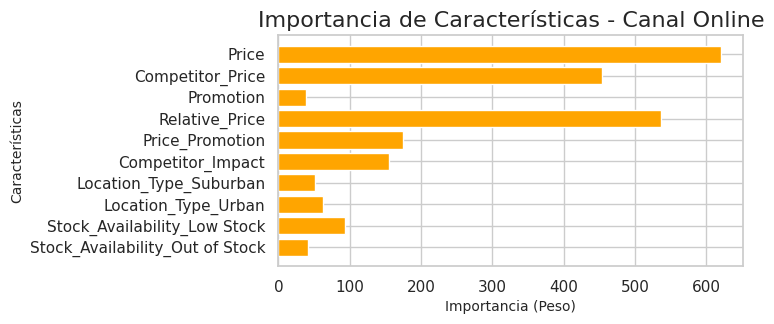

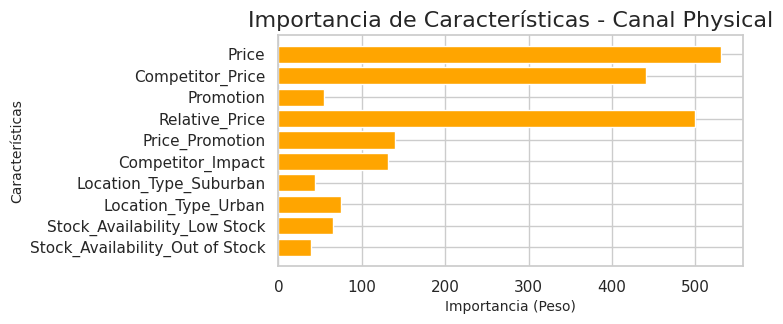

In [69]:
#  Importancia de características, las que mas influyen en el modelo
import matplotlib.pyplot as plt

# Función para graficar la importancia de características
def plot_feature_importance(model, title):
    feature_scores = model.get_booster().get_score(importance_type='weight')
    features = list(feature_scores.keys())
    scores = list(feature_scores.values())

    plt.figure(figsize=(6, 3))
    plt.barh(features, scores, color='orange')
    plt.title(f'Importancia de Características - {title}', fontsize=16)
    plt.xlabel('Importancia (Peso)', fontsize=10)
    plt.ylabel('Características', fontsize=10)
    plt.gca().invert_yaxis()
    plt.show()

# Importancia para Online
plot_feature_importance(model_online, 'Canal Online')

# Importancia para Physical
plot_feature_importance(model_physical, 'Canal Physical')

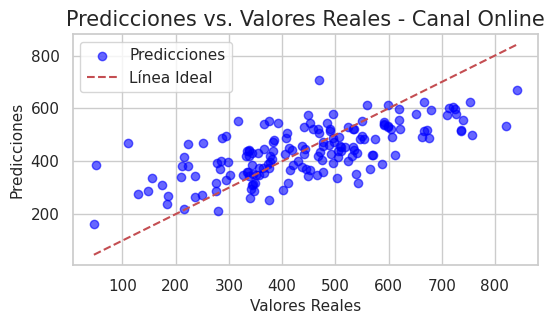

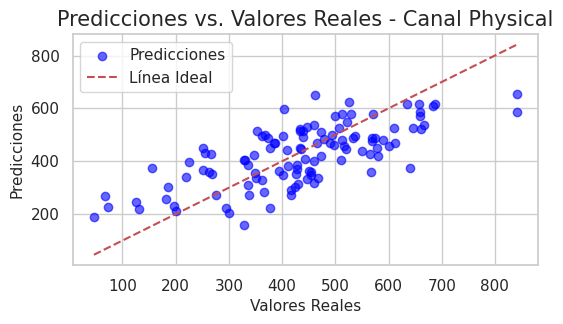

In [70]:
# Función para graficar predicciones vs valores reales
def plot_predictions_vs_actuals(y_test, y_pred, title):
    plt.figure(figsize=(6, 3))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicciones')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
    plt.title(f'Predicciones vs. Valores Reales - {title}', fontsize=15)
    plt.xlabel('Valores Reales', fontsize=11)
    plt.ylabel('Predicciones', fontsize=11)
    plt.legend()
    plt.show()

# Gráfico para Online
plot_predictions_vs_actuals(y_test_online, y_pred_online, 'Canal Online')

# Gráfico para Physical
plot_predictions_vs_actuals(y_test_physical, y_pred_physical, 'Canal Physical')

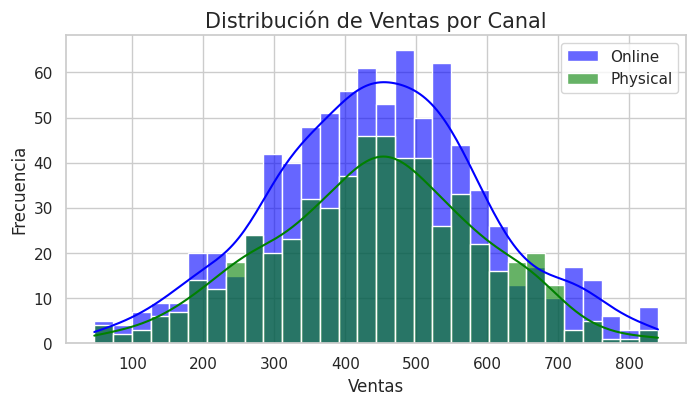

In [71]:
# Gráfico de distribución de ventas
plt.figure(figsize=(8, 4))
sns.histplot(df_online['Sales'], kde=True, bins=30, color='blue', label='Online', alpha=0.6)
sns.histplot(df_physical['Sales'], kde=True, bins=30, color='green', label='Physical', alpha=0.6)
plt.title('Distribución de Ventas por Canal', fontsize=15)
plt.xlabel('Ventas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()

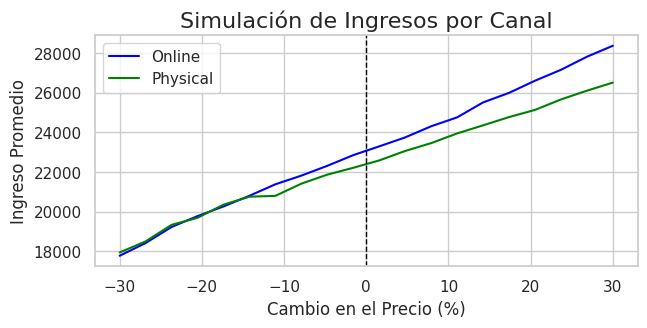

In [72]:
# Curva de Ingresos Simulados
def simulate_revenue(model, X, avg_price, avg_sales, adjustments):
    revenues = []
    for adjustment in adjustments:
        X_temp = X.copy()
        X_temp['Price'] = X['Price'] * (1 + adjustment)
        y_pred = model.predict(X_temp)
        revenue = np.mean(X_temp['Price'] * y_pred)
        revenues.append(revenue)
    return revenues

adjustments = np.linspace(-0.3, 0.3, 20)  # Cambios de precio entre -30% y +30%

# Simulación para Online
revenue_online = simulate_revenue(model_online, X_test_online, avg_price_online, avg_sales_online, adjustments)

# Simulación para Physical
revenue_physical = simulate_revenue(model_physical, X_test_physical, avg_price_physical, avg_sales_physical, adjustments)

# Gráfico de curvas de ingresos
plt.figure(figsize=(7, 3))
plt.plot(adjustments * 100, revenue_online, label='Online', color='blue')
plt.plot(adjustments * 100, revenue_physical, label='Physical', color='green')
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Línea vertical en 0
plt.title('Simulación de Ingresos por Canal', fontsize=16)
plt.xlabel('Cambio en el Precio (%)', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.legend()
plt.show()

## **Optimizacion para los tipos de canales**

In [73]:
from scipy.optimize import minimize

# Definimos la función de rentabilidad
def profit_function(price, avg_sales, avg_price, cost, elasticity):
    """Función de rentabilidad basada en la elasticidad del precio."""
    sales = avg_sales * (1 + elasticity * ((price - avg_price) / avg_price))  # Ajuste de ventas
    profit = (price - cost) * sales  # Rentabilidad total
    return -profit  # Negativo porque queremos maximizar con minimize

# Valores actuales del dataset
cost_online = 8  # Suposición
cost_physical = 10  # Suposición

# Optimización para Canal Online
result_online = minimize(profit_function, x0=avg_price_online,
                         args=(avg_sales_online, avg_price_online, cost_online, elasticity_online_direct),
                         bounds=[(avg_price_online * 0.5, avg_price_online * 1.5)])

# Optimización para Canal Physical
result_physical = minimize(profit_function, x0=avg_price_physical,
                           args=(avg_sales_physical, avg_price_physical, cost_physical, elasticity_physical_direct),
                           bounds=[(avg_price_physical * 0.5, avg_price_physical * 1.5)])

# Resultados óptimos
optimal_price_online = result_online.x[0]
optimal_price_physical = result_physical.x[0]

print(f"Precio óptimo para Online: {optimal_price_online:.2f}")
print(f"Precio óptimo para Physical: {optimal_price_physical:.2f}")

Precio óptimo para Online: 81.35
Precio óptimo para Physical: 83.61


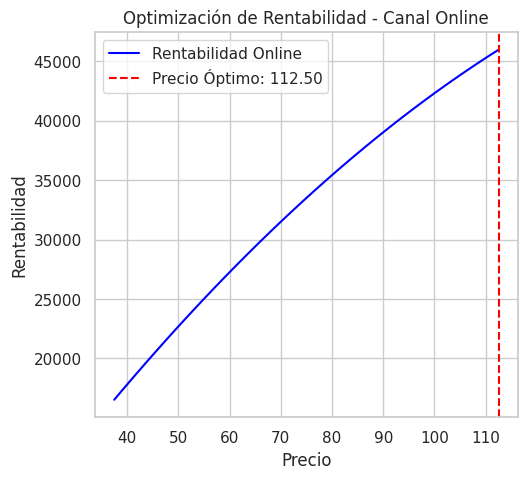

In [74]:
# Suposiciones de costos y datos actuales
cost_online = 8
cost_physical = 10

#Ventas promedio actual
avg_price_online = 75
avg_price_physical = 78

#Ventas promedio
avg_sales_online = 500
avg_sales_physical = 450

#Elasticidad calculada para cada canal
elasticity_online_direct = -0.24
elasticity_physical_direct = -0.49

# Optimización de precios para maximizar rentabilidad
result_online = minimize(profit_function, x0=avg_price_online,
                         args=(avg_sales_online, avg_price_online, cost_online, elasticity_online_direct),
                         bounds=[(avg_price_online * 0.5, avg_price_online * 1.5)])
optimal_price_online = result_online.x[0]

result_physical = minimize(profit_function, x0=avg_price_physical,
                           args=(avg_sales_physical, avg_price_physical, cost_physical, elasticity_physical_direct),
                           bounds=[(avg_price_physical * 0.5, avg_price_physical * 1.5)])
optimal_price_physical = result_physical.x[0]

# Simulación de rentabilidad en función del precio
price_range_online = np.linspace(avg_price_online * 0.5, avg_price_online * 1.5, 50)
profit_online = [-profit_function(p, avg_sales_online, avg_price_online, cost_online, elasticity_online_direct) for p in price_range_online]

price_range_physical = np.linspace(avg_price_physical * 0.5, avg_price_physical * 1.5, 50)
profit_physical = [-profit_function(p, avg_sales_physical, avg_price_physical, cost_physical, elasticity_physical_direct) for p in price_range_physical]

# Gráficas de optimización de rentabilidad
plt.figure(figsize=(12, 5))

# Gráfica de rentabilidad para Online
plt.subplot(1, 2, 1)
plt.plot(price_range_online, profit_online, label='Rentabilidad Online', color='blue')
plt.axvline(optimal_price_online, color='red', linestyle='--', label=f'Precio Óptimo: {optimal_price_online:.2f}')
plt.xlabel("Precio")
plt.ylabel("Rentabilidad")
plt.title("Optimización de Rentabilidad - Canal Online")
plt.legend()

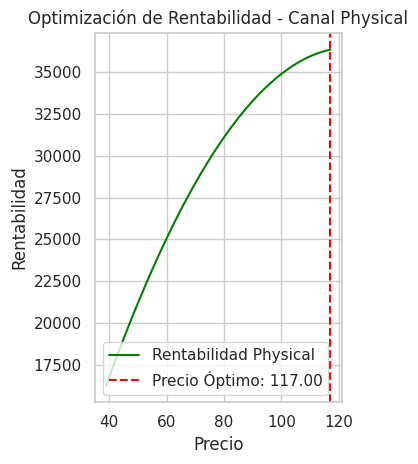

In [75]:
# Gráfica de rentabilidad para Physical
plt.subplot(1, 2, 2)
plt.plot(price_range_physical, profit_physical, label='Rentabilidad Physical', color='green')
plt.axvline(optimal_price_physical, color='red', linestyle='--', label=f'Precio Óptimo: {optimal_price_physical:.2f}')
plt.xlabel("Precio")
plt.ylabel("Rentabilidad")
plt.title("Optimización de Rentabilidad - Canal Physical")
plt.legend()

plt.tight_layout()
plt.show()

## **Recomendaciones Estrategicas**

**📌 Hallazgos Clave:**

* Elasticidad en Online: -0.24 (demanda menos elástica
  *  permite aumentos de precio sin afectar tanto las ventas).
* Elasticidad en Physical: -0.49 (demanda más elástica
 * cambios de precio afectan más las ventas).
Las promociones impactan más en tiendas físicas, mientras que en Online el precio de la competencia juega un rol fundamental.


**📌 Recomendaciones:**

* Canal Online: Aplicar precios más altos y justificar el valor con beneficios adicionales (envíos rápidos, exclusividad, fidelización).
* Canal Physical: Mantener precios más competitivos y compensar con descuentos estratégicos y experiencia en tienda.



   

**📌 Hallazgos Clave:**

Precio óptimo para Online: 81.35 nuevos soles
Precio óptimo para Physical: 83.61 nuesvos soles
La optimización mostró que ambos canales permiten ajustes de precios sin una gran caída en la demanda, aunque Physical es más sensible.

**📌 Recomendaciones:**
✅ Implementación Progresiva de los Nuevos Precios:

* Ajustar gradualmente los precios hacia los valores óptimos para evitar un choque en la demanda.
* Monitorear el impacto en ventas y rentabilidad a medida que se aplican los cambios.

**✅ Estrategia de Comunicación de Precio:**

* Justificar los aumentos de precio con mejoras en servicio, experiencia y beneficios adicionales.
* En Online, reforzar la percepción de valor con contenido educativo sobre los productos.
* En Physical, destacar promociones y crear una experiencia de compra diferenciada.